In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import math
import json 
import matplotlib.pyplot as plt
import os
from sklearn.neighbors import KNeighborsClassifier


In [215]:
arrayOfLeads = ['leadI', 'leadII', 'leadIII', 'AVR', 'AVL', 'AVF']

def getLeadsAsDF(leads, dataFromDF):
    leadsAsDF = []
    for lead in leads:
        if lead in dataFromDF['samples']:
            leadsAsDF.append(dataFromDF['samples'][lead][5000:8000])
        else:
            return None
    return leadsAsDF

def getLeadAsDF(folderName, fileName):
    with open(F"hackathon-alivecors/{folderName}/ecg/{fileName}") as f:
        data = f.readlines()
    parsedAsJson = [json.loads(line) for line in data]
    df = pd.DataFrame(parsedAsJson)
    dataFromDF = df['data'][0]['enhanced']
   
    leadsDF = getLeadsAsDF(arrayOfLeads, dataFromDF)
    if leadsDF is None:
        return None
    leadsDF = pd.DataFrame(leadsDF)
    leadsDF = leadsDF.transpose()
    leadsDF.columns = arrayOfLeads
    return leadsDF

In [210]:

arrayOfLeads = ['leadI', 'leadII', 'leadIII', 'AVR', 'AVL', 'AVF']

with open('hackathon-alivecors/AC1238426/ecg/strip30.txt') as f:
    data = f.readlines()

parsedAsJson = [json.loads(line) for line in data]
df = pd.DataFrame(parsedAsJson)
dataFromDF = df['data'][0]['enhanced']


leadsDF = getLeadsAsDF(arrayOfLeads, dataFromDF)

leadsDF = pd.DataFrame(leadsDF)
leadsDF = leadsDF.transpose()
leadsDF.columns = arrayOfLeads

leadsDF.head()

,leadI,leadII,leadIII,AVR,AVL,AVF
0,-411,-137,274,274,-343,68
1,-426,-143,283,284,-355,70
2,-441,-151,290,296,-366,69
3,-456,-160,296,308,-376,68
4,-469,-169,300,319,-385,65


In [106]:

leadsDF.describe()

,leadI,leadII,leadIII,AVR,AVL,AVF
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,37.544889,44.086111,6.541222,-40.841000,15.488000,25.292444
std,494.498015,357.466688,339.833546,396.428621,384.871991,245.985534
min,-1684.000000,-1527.000000,-1629.000000,-2287.000000,-1321.000000,-1337.000000
25%,-197.000000,-112.000000,-136.000000,-155.000000,-176.000000,-78.000000
50%,-25.000000,-13.000000,8.000000,23.000000,-16.000000,11.000000
75%,180.000000,146.000000,169.000000,148.000000,147.000000,114.000000
max,2942.000000,1838.000000,1833.000000,1518.000000,2174.000000,1621.000000


In [107]:
leadsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   leadI    9000 non-null   int64
 1   leadII   9000 non-null   int64
 2   leadIII  9000 non-null   int64
 3   AVR      9000 non-null   int64
 4   AVL      9000 non-null   int64
 5   AVF      9000 non-null   int64
dtypes: int64(6)
memory usage: 422.0 KB


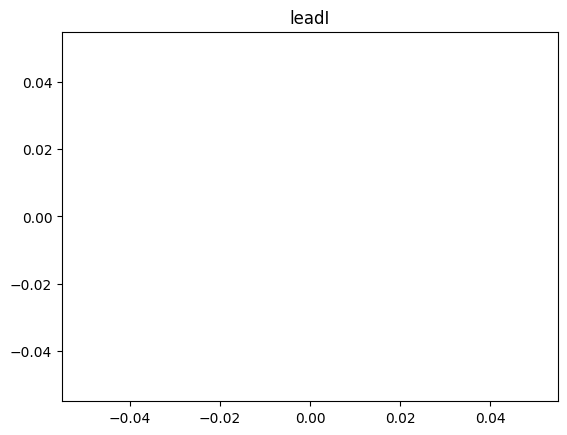

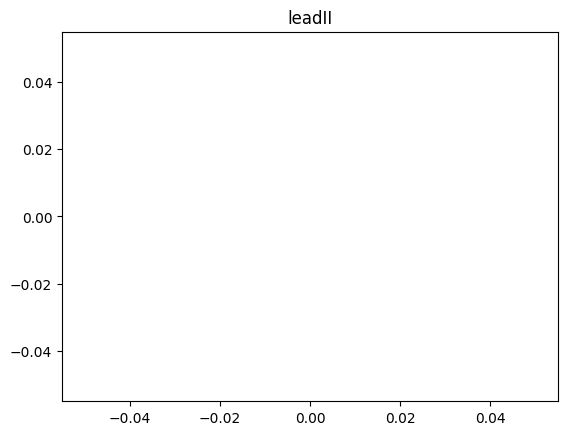

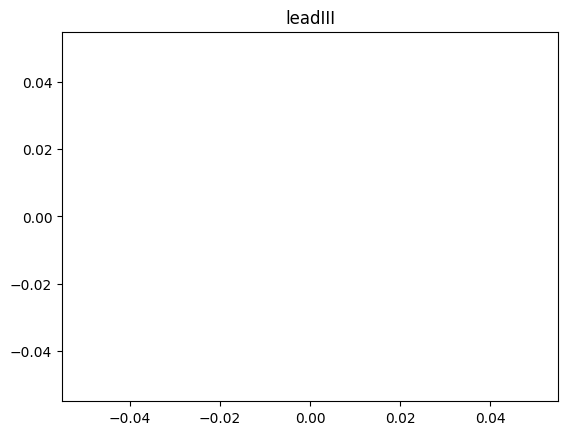

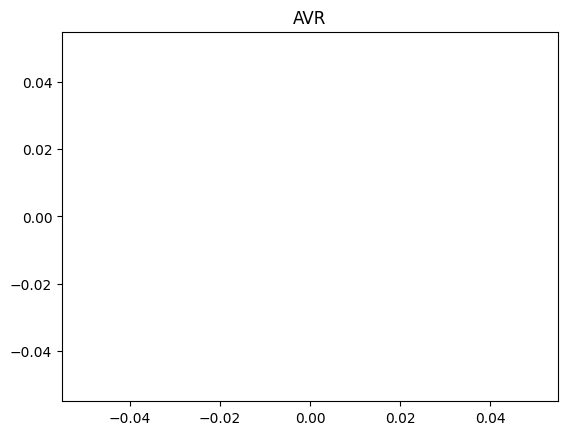

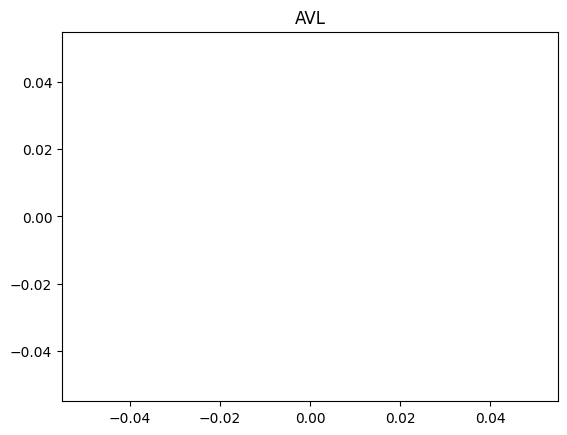

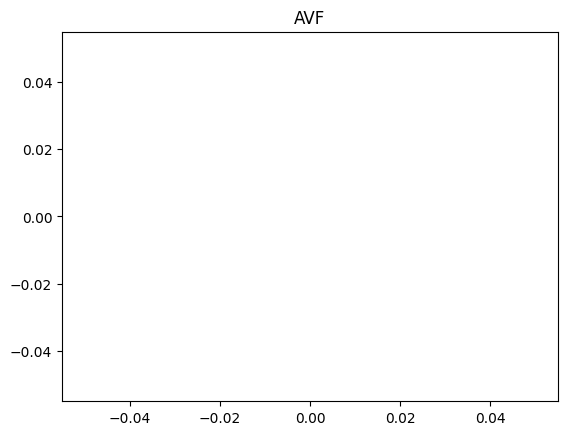

In [211]:

# make charts for each lead only for middle part of the signal
def makeChartsForLeads(leadsDF):
    for lead in arrayOfLeads:
        plt.plot(leadsDF[lead][5000:8000])
        plt.title(lead)
        plt.show()

makeChartsForLeads(leadsDF)


In [216]:
# save all folder names from /hackathon-alivecors/ to measurements array
def readMeasurements():
    measurements = []
    for measurement in os.listdir('hackathon-alivecors/'):
        measurements.append(measurement)
    return measurements

# for each measurement folder get all txt files and save them to array 
def getTxtFilesFromMeasurementFolder(measurement):
    txtFiles = []
    if os.path.exists('hackathon-alivecors/' + measurement + '/ecg/'):
        for file in os.listdir('hackathon-alivecors/' + measurement + '/ecg/'):
            if file.endswith('.txt'):
                txtFiles.append(file)
        return txtFiles

def createTupleWithMeasurement(measurement, x):
    return (measurement, x)

folders = readMeasurements()

measurementTuple = []

for measurement in folders:
    measurementTuple.append(createTupleWithMeasurement(measurement, getTxtFilesFromMeasurementFolder(measurement)))
        
# print(measurementTuple)
dataFrameMeasurementTuple = []


def getLeadsAsDFForAllTxtFiles(measurementTuple):
    for measurement in measurementTuple:
        if measurement[1] is not None:
            for file in measurement[1]:
                temp = getLeadAsDF(measurement[0], file)
                if temp is not None:
                    dataFrameMeasurementTuple.append(createTupleWithMeasurement(measurement[0],temp))

getLeadsAsDFForAllTxtFiles(measurementTuple)
print(dataFrameMeasurementTuple)

[('AC1461116',       leadI  leadII  leadIII   AVR  AVL  AVF
0       930     907      -23  -918  477  442
1       985     951      -34  -968  510  459
2      1036     991      -45 -1013  541  473
3      1111    1091      -20 -1101  566  536
4      1225    1255       30 -1240  598  643
...     ...     ...      ...   ...  ...  ...
2995     86       2      -84   -44   85  -41
2996     62     -32      -94   -15   78  -63
2997     44     -67     -111    11   77  -89
2998     31     -98     -129    33   80 -113
2999     25    -124     -149    49   87 -136

[3000 rows x 6 columns]), ('AC1461116',       leadI  leadII  leadIII   AVR  AVL   AVF
0       448     546       98  -497  175   322
1       618     896      278  -757  170   587
2       819    1328      509 -1073  155   919
3      1034    1818      784 -1426  125  1301
4      1233    2320     1087 -1776   73  1704
...     ...     ...      ...   ...  ...   ...
2995    -20     -28       -8    24   -6   -18
2996    -14     -25      -11    19  

In [217]:
folders = readMeasurements()
folderCodeDict = {}
allCodes = set()
def cleanFolderCodeDict(folderCodeDict):
    for key in list(folderCodeDict):
        if not folderCodeDict[key]:
            del folderCodeDict[key]

def changeFolderCodeDictToNotDiagnosed(folderCodeDict):
    for key in folderCodeDict:
        if not folderCodeDict[key]:
            folderCodeDict[key] = set()
            folderCodeDict[key].add("NotDiagnosed")

def folderNameToCodeDict(folders):
    for key in folders:
        if key == '.DS_Store':
            continue
        diags = set()
        if os.path.exists('hackathon-alivecors/' + key + '/dg.txt'):
            with open(F"hackathon-alivecors/{key}/dg.txt", "rb") as f:
                text = f.read().decode("windows-1250")
                text = text.split('"')
                for i in range(len(text)):
                    if text[i].startswith("R") or text[i].startswith("I"):
                        if text[i].find(":") != -1:
                            diags.add(text[i].split(":")[0])
                            allCodes.add(text[i].split(":")[0])
        folderCodeDict[key] = diags

folderNameToCodeDict(folders)

changeFolderCodeDictToNotDiagnosed(folderCodeDict)

# print((folderCodeDict))

codeAndDataDict = {}

# iterate over folderCodeDict and add diagnosis to dataFrameMeasurementTuple
def convertTupleToDict(dataFrameMeasurementTuple, folderCodeDict):
    for measurement in dataFrameMeasurementTuple:
        if measurement[0] in folderCodeDict:
            for x in folderCodeDict[measurement[0]]:
                if x in codeAndDataDict:
                    codeAndDataDict[x].append(measurement[1])
                else:
                    codeAndDataDict[x] = []
                    codeAndDataDict[x].append(measurement[1])

convertTupleToDict(dataFrameMeasurementTuple, folderCodeDict)

print((codeAndDataDict))


{'R00.2': [      leadI  leadII  leadIII   AVR  AVL  AVF
0       930     907      -23  -918  477  442
1       985     951      -34  -968  510  459
2      1036     991      -45 -1013  541  473
3      1111    1091      -20 -1101  566  536
4      1225    1255       30 -1240  598  643
...     ...     ...      ...   ...  ...  ...
2995     86       2      -84   -44   85  -41
2996     62     -32      -94   -15   78  -63
2997     44     -67     -111    11   77  -89
2998     31     -98     -129    33   80 -113
2999     25    -124     -149    49   87 -136

[3000 rows x 6 columns],       leadI  leadII  leadIII   AVR  AVL   AVF
0       448     546       98  -497  175   322
1       618     896      278  -757  170   587
2       819    1328      509 -1073  155   919
3      1034    1818      784 -1426  125  1301
4      1233    2320     1087 -1776   73  1704
...     ...     ...      ...   ...  ...   ...
2995    -20     -28       -8    24   -6   -18
2996    -14     -25      -11    19   -2   -18
2997    -

In [220]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
numberArray = []

inputArray = []
def createInput(codeAndDataDict):
    for key in codeAndDataDict:
        for data in codeAndDataDict[key]:
            flatten = data.values.flatten()
            reshaped = np.reshape(flatten, (1, -1))
            array = reshaped.tolist()
            if len(array[0]) != 18000:
                print(len(array[0]))
                break
            inputArray.append(array[0])
            numberArray.append(key)




createInput(codeAndDataDict)

neigh.fit(inputArray, numberArray)

score = neigh.score(inputArray, numberArray)
print(score)
print(neigh.predict(inputArray[500:600]))

0
6378
6378
14880
13614
0.5704971475142624
['I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8'
 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8'
 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8' 'I42.8'
 'I42.8' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1'
 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1'
 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1'
 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1'
 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1'
 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1' 'I44.1'
 'I44.1' 'I44.1' 'I44.1' 'I48.0' 'I48.0' 'I48.0' 'I48.0' 'I48.0' 'I48.0'
 'I48.0' 'I48.0' 'I48.0' 'I48.0' 'I48.0' 'I48.0' 'I48.0' 'I48.0' 'I48.0'
 'I48.0']
